## K-PCA (Kernal - Principal Component Analysis):
Kernel Principal Component Analysis (K-PCA) is an extension of Principal Component Analysis (PCA) that allows for non-linear dimensionality reduction. By utilizing kernel methods, K-PCA can effectively uncover complex structures in data that PCA, which operates under the assumption of linear relationships, might miss.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from pathlib import Path
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sys import getsizeof
from tqdm import tqdm
%matplotlib inline


In [ ]:



# Load the dataset
dataset = pd.read_csv(
    '../Datasets/Household_Electric_Power_Consumption/household_power_consumption.csv',
    na_values='?'
)

#KPCADataset.to_csv('./Results/household_power_consumption/K-PCA_Results.csv', mode='a', index=False)

batchSize = 4000
currentIndex = 0
startIndex = currentIndex * batchSize
endIndex = startIndex + batchSize

dataset.dropna(inplace=True)
# Select relevant columns
features = dataset[['Global_active_power',
                'Global_reactive_power',
                'Voltage', 
                'Global_intensity',
                'Sub_metering_1',
                'Sub_metering_2',
                'Sub_metering_3']].astype(np.float32)

start = time.time()
# Step 1: Standardize the Data
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)
#Only calculating error on a small slice of the dataset.
# numRows, numColumns = features.shape
# loopRuns = round(numRows / batchSize)
# print(loopRuns)
# Step 2: Calculating errors only since calculation of entire dataset takes too long
#kpca = KernelPCA( kernel='rbf', gamma=15)  # Using RBF kernel
#calculating error based on number of dimensions
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
compressionRatio = []
dimensions = range(1, scaledFeatures.shape[1] + 1)
featureSlice = features[startIndex:endIndex].copy()
datasetSlice = scaler.fit_transform(featureSlice)
for d in tqdm(dimensions):
    kpca = KernelPCA(n_components=d,
                     kernel='rbf',
                     #gamma=20,
                     fit_inverse_transform= True)
    datasetReduced = np.float32(kpca.fit_transform(datasetSlice))
    datasetReconstructed = kpca.inverse_transform(datasetReduced).astype(np.float32)
    rootMeanSquaredValues.append(root_mean_squared_error(
        datasetSlice,
        datasetReconstructed,))
    meanAbsoluteErrorValues.append(mean_absolute_error(
        datasetSlice,
        datasetReconstructed))
    rSquaredErrorValues.append(r2_score(
        datasetSlice,
        datasetReconstructed))
    compressionRatio.append(
        getsizeof(datasetReduced) /
        getsizeof( datasetSlice) )
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/household_power_consumption/Details K-PCA.csv', mode='w', index=False)


  0%|          | 0/7 [00:00<?, ?it/s]

: 

implementing information loss graph:

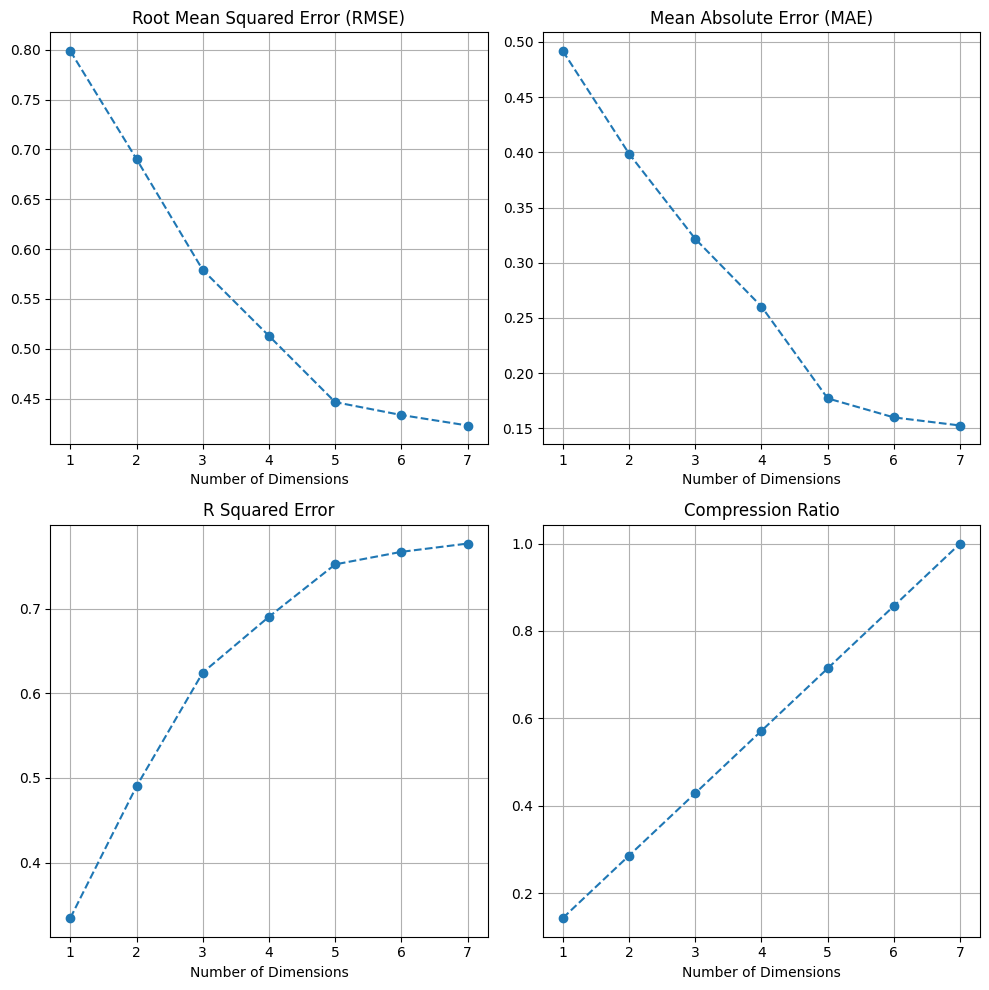

In [19]:
#Plotting the results
errorValues = pd.read_csv(
    "./Results/household_power_consumption/Details K-PCA.csv",
    )
errorValues.index += 1
numRows, numColums = errorValues.shape
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.plot(errorValues[['Root Mean Squared Values']], marker='o', linestyle='--')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,2)
plt.plot(errorValues[['Mean Absolute Values']], marker='o', linestyle='--')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,3)
plt.plot(errorValues[['R Squared Error Values']], marker='o', linestyle='--')
plt.title('R Squared Error')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,4)
plt.plot(errorValues[['Compression Ratio']], marker='o', linestyle='--')
plt.title('Compression Ratio')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.tight_layout()
plt.show()


In [4]:
#Micro PMU Dataset

# batchSize = 23232
batchSize = 4096
currentIndex = 0
startIndex = 0
endIndex = startIndex + batchSize


# Load the dataset
dataset = pd.read_csv(
    "../Datasets/Micro PMU October 1 Dataset/_LBNL_a6_bus1_2015-10-01.csv")
dataset.dropna(inplace=True)
features = dataset[['VL1',
                'VL2',
                'VL3',
                'AL1',
                'AL2',
                'AL3',
                'IC1',
                'IC2',
                'IC3',
                'AC1',
                'AC2',
                'AC3',
                'Events']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
featureSlice = features[startIndex:endIndex].copy()
datasetSlice = scaler.fit_transform(featureSlice)
for d in tqdm(dimensions):
    kpca = KernelPCA(n_components=d,
                     kernel='rbf',
                     #gamma=20,
                     fit_inverse_transform= True)
    datasetReduced = np.float32(kpca.fit_transform(datasetSlice))
    datasetReconstructed = kpca.inverse_transform(datasetReduced).astype(np.float32)
    rootMeanSquaredValues.append(root_mean_squared_error(
        datasetSlice,
        datasetReconstructed,))
    meanAbsoluteErrorValues.append(mean_absolute_error(
        datasetSlice,
        datasetReconstructed))
    rSquaredErrorValues.append(r2_score(
        datasetSlice,
        datasetReconstructed))
    compressionRatio.append(
        getsizeof(datasetReduced) /
        getsizeof( datasetSlice) )
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/Micro PMU October 1 Dataset/Details K-PCA.csv', mode='w', index=False)

100%|██████████| 13/13 [01:16<00:00,  5.85s/it]


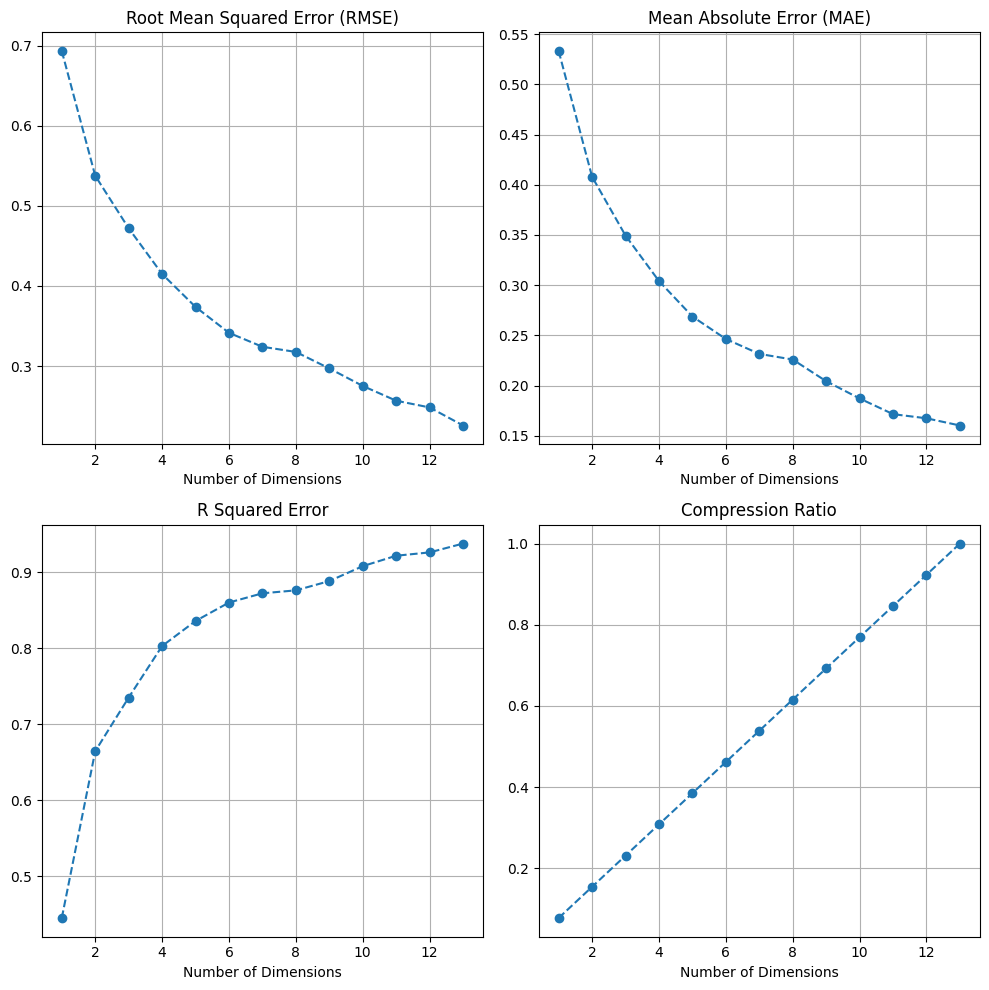

In [6]:
#Plotting the results
errorValues = pd.read_csv(
    "./Results/Micro PMU October 1 Dataset/Details K-PCA.csv",
    )
errorValues.index += 1
numRows, numColums = errorValues.shape
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.plot(errorValues[['Root Mean Squared Values']], marker='o', linestyle='--')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,2)
plt.plot(errorValues[['Mean Absolute Values']], marker='o', linestyle='--')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,3)
plt.plot(errorValues[['R Squared Error Values']], marker='o', linestyle='--')
plt.title('R Squared Error')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.subplot(2,2,4)
plt.plot(errorValues[['Compression Ratio']], marker='o', linestyle='--')
plt.title('Compression Ratio')
plt.xlabel('Number of Dimensions')
plt.grid()

plt.tight_layout()
plt.show()


Rows removed because empty: 50
Total Rows = 25236
Total Time: 22.81671929359436


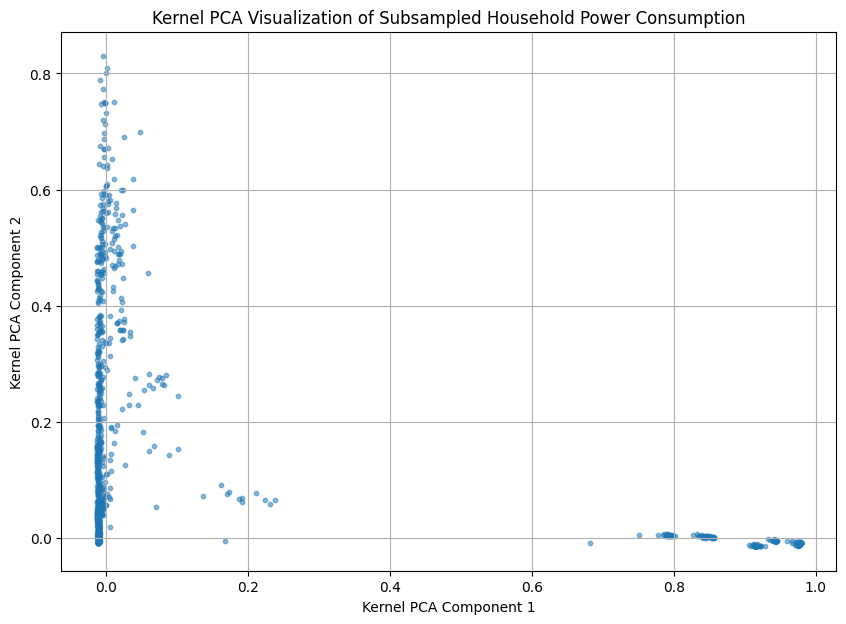

In [ ]:
data = pd.read_csv(
    "../Datasets/Smart meters in London/hhblock_dataset/hhblock_dataset/block_0.csv")
data.dropna(inplace=True)

features = data[['hh_0','hh_1','hh_2','hh_3','hh_4','hh_5','hh_6','hh_7','hh_8','hh_9','hh_10',
                'hh_11','hh_12','hh_13','hh_14','hh_15','hh_16','hh_17','hh_18','hh_19','hh_20',
                'hh_21','hh_22','hh_23','hh_24','hh_25','hh_26','hh_27','hh_28','hh_29','hh_30',
                'hh_31','hh_32','hh_33','hh_34','hh_35','hh_36','hh_37','hh_38','hh_39','hh_40',
                'hh_41','hh_42','hh_43','hh_44','hh_45','hh_46','hh_47'
                ]].astype(np.float32)

startTime = time.time()# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
rootMeanSquaredValues = []
meanAbsoluteErrorValues = []
rSquaredErrorValues = []
compressionRatio = []
dimensions = range(1, scaled_features.shape[1] + 1)
featureSlice = features[startIndex:endIndex].copy()
datasetSlice = scaler.fit_transform(featureSlice)
for d in tqdm(dimensions):
    kpca = KernelPCA(n_components=d,
                     kernel='rbf',
                     #gamma=20,
                     fit_inverse_transform= True)
    datasetReduced = np.float32(kpca.fit_transform(datasetSlice))
    datasetReconstructed = kpca.inverse_transform(datasetReduced).astype(np.float32)
    rootMeanSquaredValues.append(root_mean_squared_error(
        datasetSlice,
        datasetReconstructed,))
    meanAbsoluteErrorValues.append(mean_absolute_error(
        datasetSlice,
        datasetReconstructed))
    rSquaredErrorValues.append(r2_score(
        datasetSlice,
        datasetReconstructed))
    compressionRatio.append(
        getsizeof(datasetReduced) /
        getsizeof( datasetSlice) )
Details = pd.DataFrame({
    'Root Mean Squared Values' : rootMeanSquaredValues,
    'Mean Absolute Values' : meanAbsoluteErrorValues,
    'R Squared Error Values' : rSquaredErrorValues,
    'Compression Ratio' : compressionRatio
    })
Details.index += 1
Details.to_csv('./Results/Smart Meters in London/Details KPCA hh block_0.csv', mode='w', index=False)

In [3]:
##Smart Meter Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import mean_squared_error

# batchSize = 23232
batchSize = 25236

# Load the dataset
data = pd.read_csv(
    "../Datasets/Smart meters in London/hhblock_dataset/hhblock_dataset/block_0.csv")
numRowsBefore, numColumsBefore = data.shape
data.dropna(inplace=True)
numRowsAfter, numColumsAfter = data.shape
print("Rows removed because empty: " + str(numRowsBefore - numRowsAfter))
print("Total Rows = " + str(numRowsAfter))

featureshh = data[['hh_0','hh_1','hh_2','hh_3','hh_4','hh_5','hh_6','hh_7','hh_8','hh_9','hh_10',
                'hh_11','hh_12','hh_13','hh_14','hh_15','hh_16','hh_17','hh_18','hh_19','hh_20',
                'hh_21','hh_22','hh_23','hh_24','hh_25','hh_26','hh_27','hh_28','hh_29','hh_30',
                'hh_31','hh_32','hh_33','hh_34','hh_35','hh_36','hh_37','hh_38','hh_39','hh_40',
                'hh_41','hh_42','hh_43','hh_44','hh_45','hh_46','hh_47'
                ]]
# Drop rows with NaN values
featureshh = featureshh.dropna()
# Step 1: Standardize the Data
scaler = StandardScaler()
features_scaledhh = scaler.fit_transform(featureshh)




errors = [] #To Store errors
dimensions = range(1, features_scaledhh.shape[1] + 1)
print("Number of dimensions in this dataset is: " + str(len(dimensions)))



batchSize = 25236
startTime = time.time()
for d in dimensions:
    startIterationTime = time.time()
    kpca = KernelPCA(n_components=d,
                     kernel='rbf',
                     gamma=15,
                     fit_inverse_transform= True)  # Using RBF kernel
    X_reduced = kpca.fit_transform(features_scaledhh)
    X_reconstructed = kpca.inverse_transform(X_reduced)
    mse = mean_squared_error(features_scaledhh, X_reconstructed)
    errors.append(mse)
    endIterationTime = time.time()
    print("Iteration #: " + str(d))
    print("Iteration Time: " + str(endIterationTime - startIterationTime))
    print("Error calculated for dimension: " + str(mse))

endTime = time.time()
print("Time taken: " + str(endTime - startTime))
#Plotting the results
plt.plot(dimensions, errors, marker='o', linestyle='--')
plt.title('Reconstruction Error vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(dimensions)
plt.grid()
plt.show()

Rows removed because empty: 50
Total Rows = 25236
Number of dimensions in this dataset is: 48
Iteration #: 1
Iteration Time: 165.42909383773804
Error calculated for dimension: 0.9902773299013038
Iteration #: 2
Iteration Time: 146.0363962650299
Error calculated for dimension: 0.9776105119647301
Iteration #: 3
Iteration Time: 146.64250874519348
Error calculated for dimension: 0.9746771870856584
Iteration #: 4
Iteration Time: 146.82322359085083
Error calculated for dimension: 0.9741487952820954
Iteration #: 5
Iteration Time: 146.55853986740112
Error calculated for dimension: 0.9740103695491227
Iteration #: 6
Iteration Time: 148.70325756072998
Error calculated for dimension: 0.973513117461199
Iteration #: 7
Iteration Time: 148.42096257209778
Error calculated for dimension: 0.9728424334691012


KeyboardInterrupt: 

: 